In [1]:
import sys
sys.path.insert(0, '../')
from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline

In [31]:
np.random.RandomState(1)
N_points = 25
N_neurons = N_points*2
x = np.random.rand(N_points)
y = np.random.rand(N_points)

Since points that are close in the original 2D space will be mapped close on the som, the idea is to let the 

Once the som is trained we will visit the points from the one mapped to the first neuron (the one on the left) to the last neuron (on the right). Points that are mapped to the same neuron are visited consecutively.

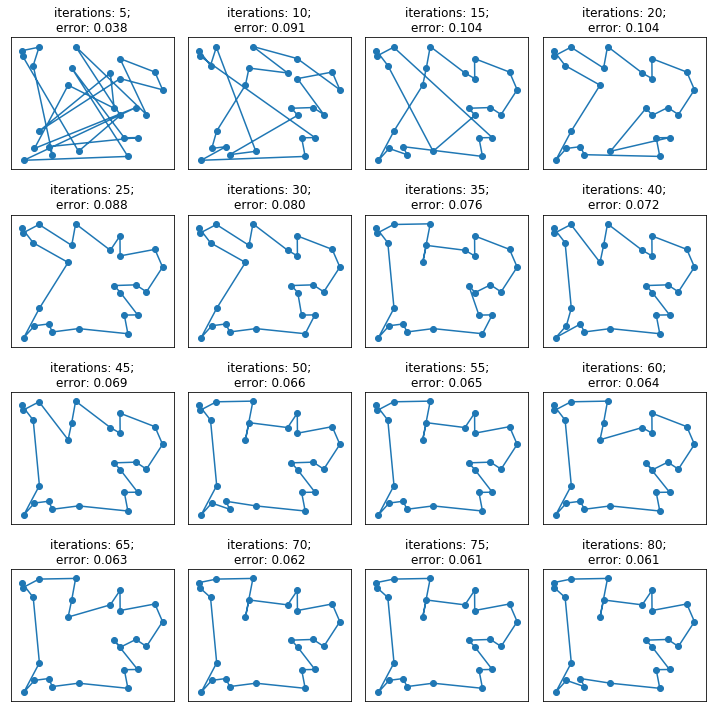

In [39]:
som = MiniSom(1, N_neurons, 2, sigma=3,
              neighborhood_function='gaussian', random_seed=0)
points = np.array([x,y]).T
som.random_weights_init(points)

plt.figure(figsize=(10, 10))
for i, iterations in enumerate(range(5, 81, 5)):
    som.train(points, iterations, verbose=False, random_order=False)
    plt.subplot(4, 4, i+1)
    plt.scatter(x,y)
    visit_order = np.argsort([som.winner(p)[1] for p in points])
    visit_order = np.concatenate((visit_order, [visit_order[0]]))
    plt.plot(points[visit_order][:,0], points[visit_order][:,1])
    plt.title("iterations: {i};\nerror: {e:.3f}".format(i=iterations, 
                                                        e=som.quantization_error(points)))
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()